In [38]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## MSEを求める

In [6]:
y = df['tip']
X = df['total_bill'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_squared_error(y_pred, y_test)


0.8711845537539947

# 多項式特徴量

In [7]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


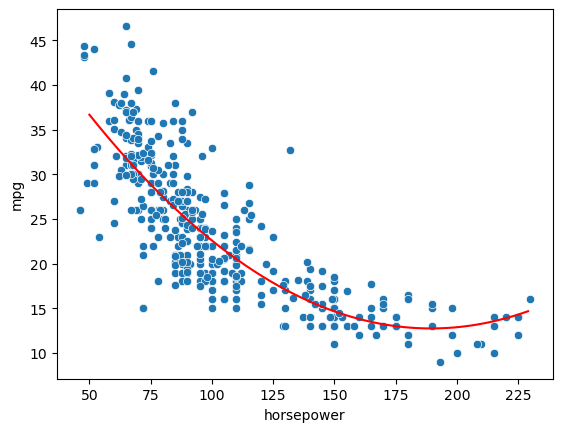

In [13]:
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']

# 多項式特徴量
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X)

# 線形回帰
model = LinearRegression()
model.fit(X_poly, y)

# 描画
X_axis = np.arange(50, 230).reshape(-1, 1)
X_axis_ = poly.fit_transform(X_axis)
pred = model.predict(X_axis_)
sns.scatterplot(x=df['horsepower'], y=y)
plt.plot(X_axis, pred, 'r')

## 多項式回帰と線形回帰の精度を比較

In [37]:
y = df['mpg'].values
X = df['horsepower'].values.reshape(-1, 1)

degree = [1, 2, 3]
k = 5
n_repeats = 3
model = LinearRegression()
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats)
results = {}

for d in degree:
  mse_list = []
  poly = PolynomialFeatures(d)
  for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
  avg_mse = np.mean(mse_list)
  results[d] = avg_mse

# 結果を表示
for k_val, mse in results.items():
  print(f"k={k_val}, MSE={mse}")

k=1, MSE=24.18446248917208
k=2, MSE=19.223555169988312
k=3, MSE=19.482557137762605


## KNN回帰で予測する

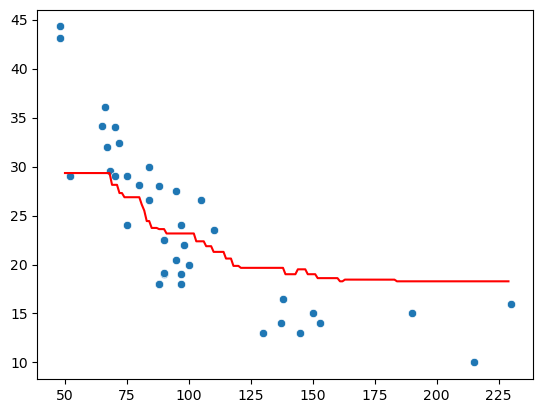

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
model = KNeighborsRegressor(n_neighbors=20)
model.fit(X_train, y_train)
X_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(X_axis)
sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.plot(X_axis, y_pred, 'r')

In [61]:
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values
k_list = np.arange(1, 31)
k = 5
n_repeats = 3
model = KNeighborsRegressor()
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats)
score_list = []
results = {}

for k in k_list:
  mse_list = []
  model = KNeighborsRegressor(n_neighbors=k)
  for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

  avg_mse = np.mean(mse_list)
  results[k] = avg_mse

# 結果を表示
# kの値が大きいほどVarianceが小さくなる
for k_val, mse in results.items():
    print(f"k={k_val}, MSE={mse}")


k=1, MSE=29.242308666017525
k=2, MSE=22.70345401925782
k=3, MSE=22.47263945087574
k=4, MSE=20.683321060532297
k=5, MSE=20.184575302391004
k=6, MSE=19.91747297053626
k=7, MSE=19.655598182408312
k=8, MSE=19.95467633783674
k=9, MSE=19.46550910331876
k=10, MSE=19.145334125284
k=11, MSE=19.146912944618354
k=12, MSE=19.17529363362064
k=13, MSE=18.60440044057009
k=14, MSE=18.910534785839037
k=15, MSE=18.775210802649454
k=16, MSE=18.83617803253138
k=17, MSE=19.050596646410057
k=18, MSE=18.754051450012888
k=19, MSE=18.645847503673515
k=20, MSE=18.97007645001623
k=21, MSE=19.006983943968873
k=22, MSE=18.582367618157317
k=23, MSE=18.80201862544731
k=24, MSE=18.618313858760988
k=25, MSE=18.88119264498539
k=26, MSE=19.03212809997906
k=27, MSE=18.75184317810223
k=28, MSE=18.62978957655766
k=29, MSE=18.29028669483208
k=30, MSE=18.552586961664687
